In [1]:
import Simulator.ChaoticSystem as CS
import matplotlib.pyplot as plt
import numpy as np


# Test ChaoticSystem

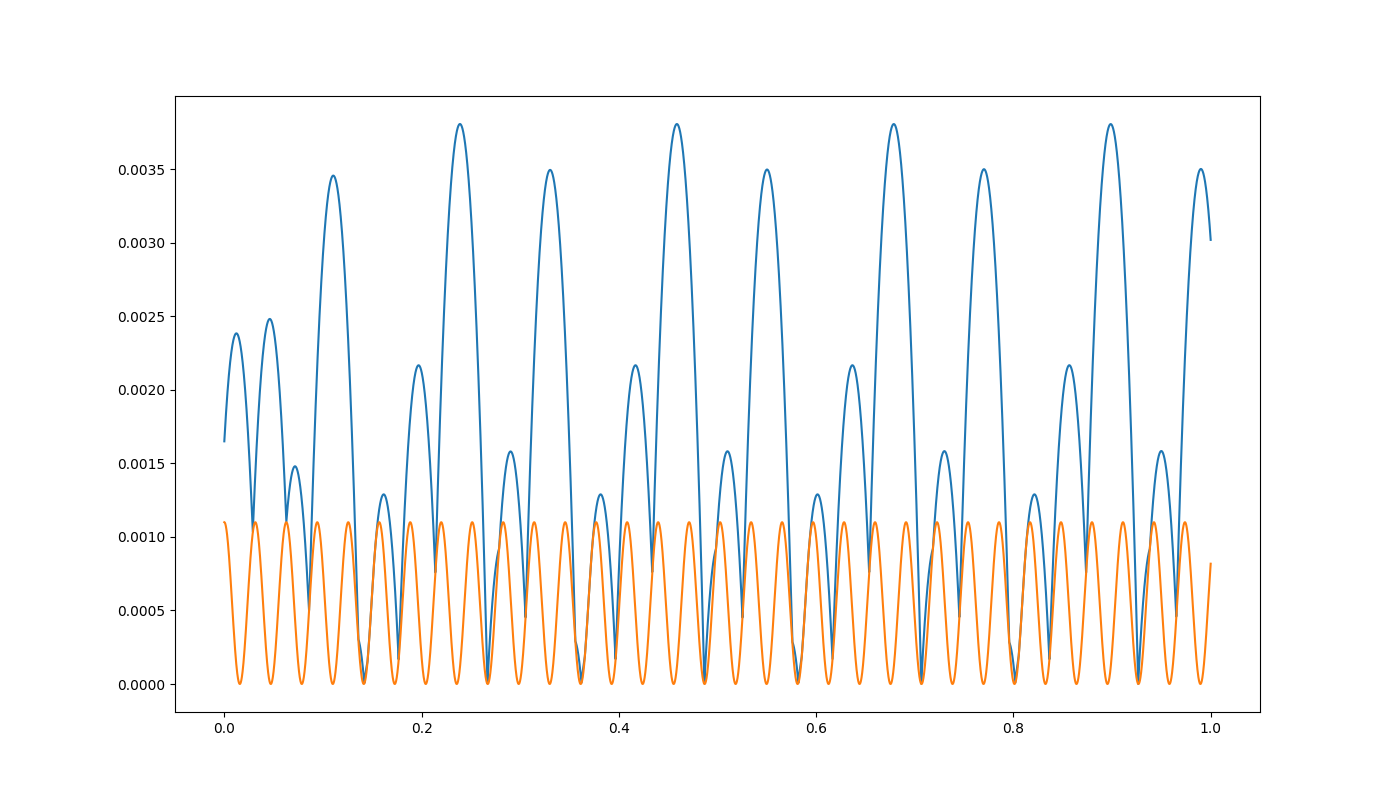

In [3]:
x0=0.0012
v0=0.12
A=0.41e-3
w=200

#b=ball(x0,2)
#p=platform(A=A,w=10)
c=CS.chaotic_system(x0,v0,A,w,0.53)
dt=0.0001
ndt=10_000


t_arr=[]
A_arr=[]

for A in np.linspace(300,550,250):
    A=A*1e-6
    #print('--------------',A)
    c.reset_platform(A)
    c.reset_ball(3*A,v0)
    c.reset()
    

    xcb = [c.get_ball_x()]
    xcp = [c.get_platform_x()]

    t = [0]
    for i in range(ndt):
        c.evolve(dt)
        t.append(t[i]+dt)
        xcb.append(c.get_ball_x())
        xcp.append(c.get_platform_x())
    
    A_arr.append([A for j in range(len( c.get_t_collisions()))])
    t_arr.append(c.get_t_collisions())
    
fig = plt.figure(figsize=(14,8))
plt.plot(t,xcb)
plt.plot(t,xcp)

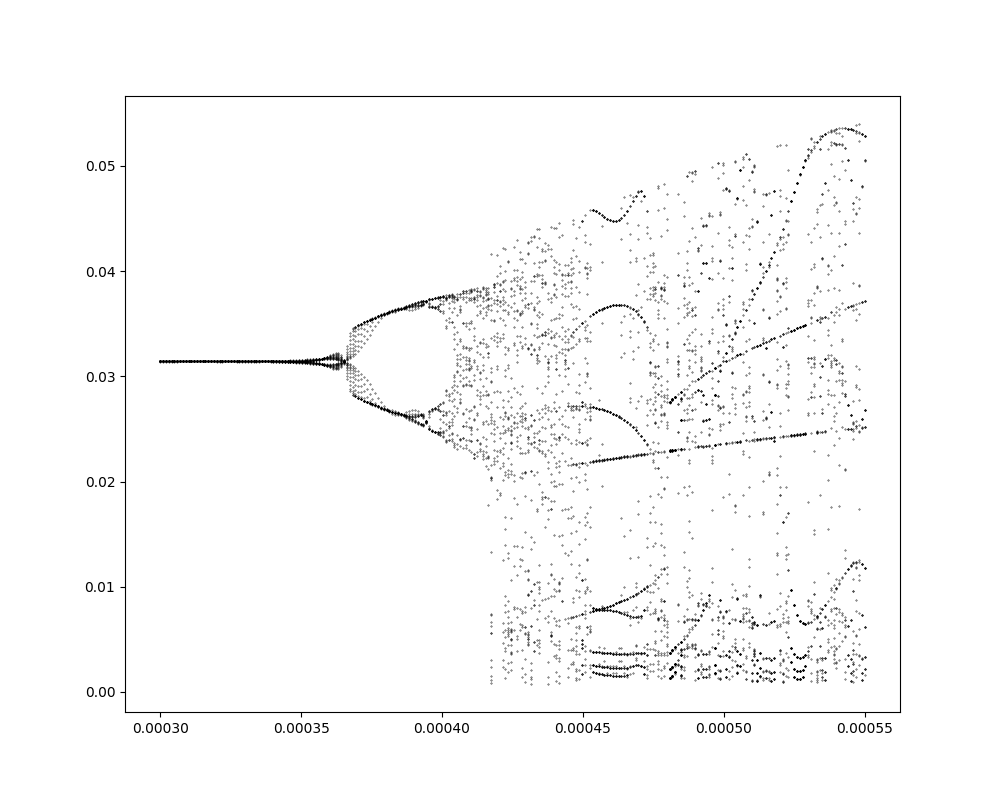

In [4]:
n_start=10
fig=plt.figure(figsize=(10,8))
for i in range(len(t_arr)):
    plt.scatter(A_arr[i][n_start:],t_arr[i][n_start:],c='k',s=0.1)

# Grid Layout

In [1]:
import matplotlib
%matplotlib widget

In [4]:
from GUIS.simple_evolution import GUI

In [5]:
GUI

GridspecLayout(children=(Button(description='Run', layout=Layout(grid_area='widget001', height='auto', width='…